In [ ]:
import pandas as pd
df = pd.read_csv("replicating_ncs.csv", index_col=0)

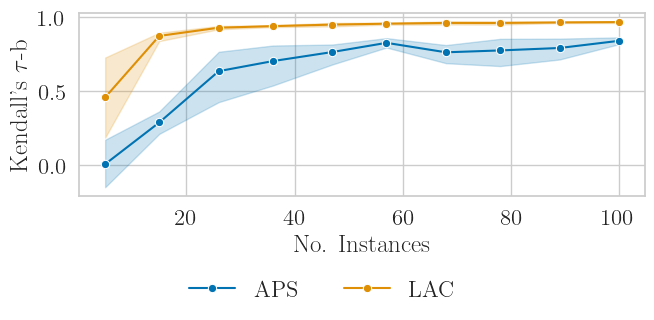

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5,rc={'text.usetex' : True})
sns.set_style("whitegrid")
sns.set_palette("colorblind")
plt.rc('font', **{'family': 'serif'})
plt.rcParams["figure.figsize"] = (7, 3)

df = df[["aps", "lac", "rand_aps", "num_inst"]]

fig, ax = plt.subplots()

ax.set_title("")
ax.set_ylabel(r"Kendall's $\tau$-b")
ax.set_xlabel(r"No. Instances")
# ax.set_ylim([0.0,1])
sns.lineplot(data=df, x="num_inst", y="aps", ax = ax, marker="o",label="APS", legend=False)
sns.lineplot(data=df, x="num_inst", y="lac", ax = ax, marker="o",label="LAC", legend=False)
lgd = fig.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.08), frameon=False)

fig.tight_layout() 
plt.savefig("replicating.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')


In [12]:
df.to_csv("replicating_ncs.csv")

In [8]:
from itertools import product
for run, score, size in product(range(0,5), ["lac", "aps"], range(0,10)):
    skills = skills_overall[run][score][size].detach().cpu().numpy()
    conformities = conformities_overall[run][score][size]
    print(kendalltau(skills.round(7), conformities.round(7)))

    import numpy as np
    from scipy.stats import kendalltau

    # Example data
    data1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    data2 = np.array([1, 3, 2, 4, 6, 5, 8, 7, 10, 9])

    # Rank the data
    ranked_data1 = np.argsort(np.argsort(data1))
    ranked_data2 = np.argsort(np.argsort(data2))

    # Select the top 80% of the ranked entries
    top_80_percent_index = int(0.8 * len(data1))
    top_ranked_data1 = ranked_data1[:top_80_percent_index]
    top_ranked_data2 = ranked_data2[:top_80_percent_index]

    # Compute Kendall Tau for the top 80% ranked entries
    tau, p_value = kendalltau(top_ranked_data1, top_ranked_data2)

    print(f"Kendall Tau: {tau}, p-value: {p_value}")



SignificanceResult(statistic=0.6266666666666668, pvalue=2.5087010784337538e-20)
Kendall Tau: 0.7857142857142856, p-value: 0.005505952380952381
SignificanceResult(statistic=0.882828282828283, pvalue=1.0137442672559246e-38)
Kendall Tau: 0.7857142857142856, p-value: 0.005505952380952381
SignificanceResult(statistic=0.9179797979797981, pvalue=1.004594783941848e-41)
Kendall Tau: 0.7857142857142856, p-value: 0.005505952380952381
SignificanceResult(statistic=0.9523232323232325, pvalue=9.01733598889199e-45)
Kendall Tau: 0.7857142857142856, p-value: 0.005505952380952381
SignificanceResult(statistic=0.9636363636363638, pvalue=8.455454427329116e-46)
Kendall Tau: 0.7857142857142856, p-value: 0.005505952380952381
SignificanceResult(statistic=0.9616161616161617, pvalue=1.2929434140736449e-45)
Kendall Tau: 0.7857142857142856, p-value: 0.005505952380952381
SignificanceResult(statistic=0.9781818181818184, pvalue=3.8710978185541377e-47)
Kendall Tau: 0.7857142857142856, p-value: 0.005505952380952381
Sign

In [9]:
import pickle
with open('skills.pkl', 'wb') as file:
    pickled_skills = pickle.dumps(skills_overall)
with open('conformities.pkl', 'wb') as file:
    pickled_conformities = pickle.dumps(conformities_overall)
with open('num_instances.pkl', 'wb') as file:
    pickled_num_instances = pickle.dumps(num_instances_to_check)